Entos Mexico

In [490]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [491]:
df_visits = pd.read_csv("visits_2020-07-01_2021-12-20.csv")
df_location = pd.read_csv("ubicacion_2020-07-01_2021-12-20.csv")

Visitas Entos

In [492]:
df_visits = df_visits.drop([0, 1])

Cof Correlacion:  0.8456026386017954


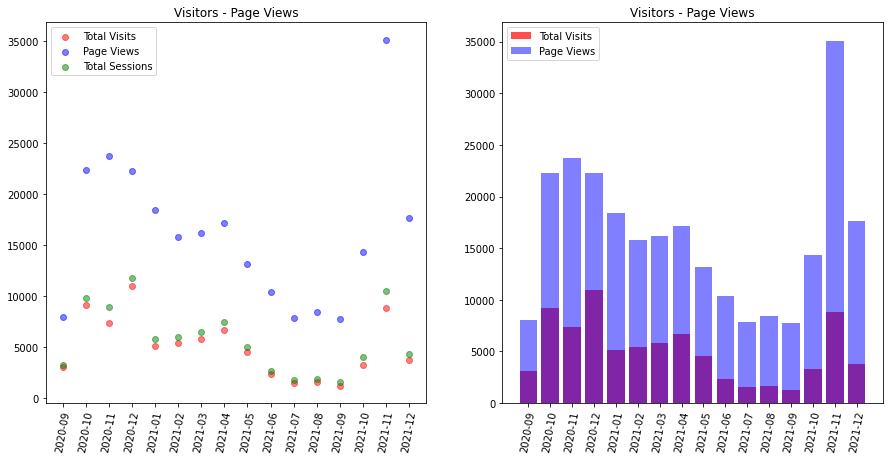

In [493]:
# Plot scatter de fecha visita  vs sesiones
x_values = range(len(df_visits.total_visitors))

plt.figure(figsize = (15, 7))

ax1 = plt.subplot(1, 2, 1)
ax1.scatter(x_values, df_visits.total_visitors, alpha = 0.5, color = "red", label = "Total Visits")
ax1.scatter(x_values, df_visits.total_pageviews, alpha = 0.5, color = "blue", label = "Page Views")
ax1.scatter(x_values, df_visits.total_sessions, alpha = 0.5, color = "green", label = "Total Sessions")
ax1.set_xticks(x_values)
ax1.set_xticklabels(df_visits.month)
ax1.set_title("Visitors - Page Views")
plt.xticks(rotation = 80)
plt.legend()

ax2 = plt.subplot(1, 2, 2)
ax2.bar(x_values, df_visits.total_visitors, alpha = 0.7, color = "red", label = "Total Visits")
ax2.bar(x_values, df_visits.total_pageviews, alpha = 0.5, color = "blue", label = "Page Views")
ax2.set_xticks(x_values)
ax2.set_xticklabels(df_visits.month)
ax2.set_title("Visitors - Page Views")
plt.xticks(rotation = 80)
plt.legend()

corr, _ = pearsonr(df_visits.total_visitors, df_visits.total_pageviews)
print("Cof Correlacion: ", corr)

# Cuantas veces se mete una visita a la pagina 

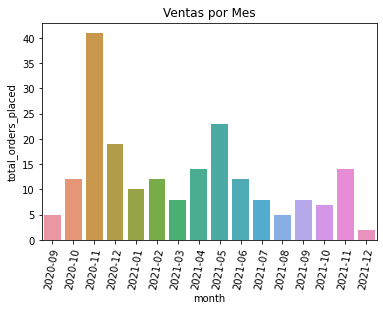

Cof Correlacion:  0.42619494638646427


In [494]:
# Ordenes Ventas
plt.clf()
sns.barplot(data = df_visits, x = "month", y = "total_orders_placed")
plt.xticks(rotation = 80)
plt.title("Ventas por Mes")
plt.show()

corr, _ = pearsonr(df_visits.total_orders_placed, df_visits.total_pageviews)
print("Cof Correlacion: ", corr)

Crear un heatmap de correlacion entre variables numericas

In [495]:
df_location = df_location.drop([0, 1]).reset_index(drop = True)

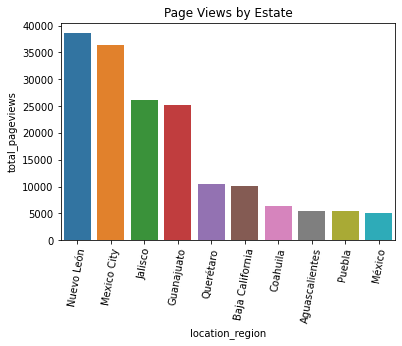

In [496]:
# De donde son la mayor cantidad de visitas por estado
location_pageviews = df_location.groupby("location_region").total_pageviews.sum().reset_index()
location_pageviews = location_pageviews.sort_values(by = "total_pageviews", ascending = False)

# location_pageviews_order = df_location[df_location.total_orders_placed > 0]
# location_pageviews_order = location_pageviews_order.groupby("location_region").total_pageviews.sum().reset_index()
# location_pageviews_order = location_pageviews_order.sort_values(by = "total_pageviews", ascending = False)

plt.clf()
sns.barplot(data = location_pageviews[:10], x = "location_region", y = "total_pageviews")
plt.xticks(rotation = 80)
plt.title("Page Views by Estate")
plt.show()

# sns.barplot(data = location_pageviews_order[:10], x = "location_region", y = "total_pageviews")
# plt.xticks(rotation = 80)
# plt.title("Page Views by Estate Buy")
# plt.show()


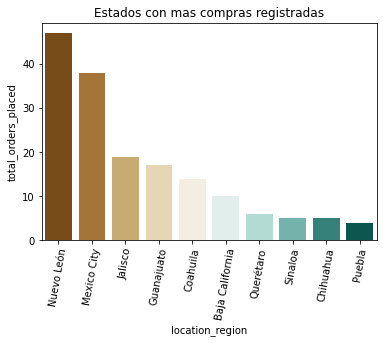

In [497]:
# Analizar estados de compra que estado compra mas 
df_orders = df_location[df_location.total_orders_placed > 0].reset_index(drop = True)
df_orders = df_orders.groupby("location_region").total_orders_placed.sum().reset_index()
df_orders = df_orders.sort_values(by = "total_orders_placed", ascending= False).reset_index(drop = True)

plt.clf()
sns.barplot(data = df_orders[:10], x = "location_region", y = "total_orders_placed", palette = "BrBG")
plt.xticks(rotation = 80)
plt.title("Estados con mas compras registradas")
plt.show()

Text(0.5, 1.0, 'Ciudades con mas compras registradas')

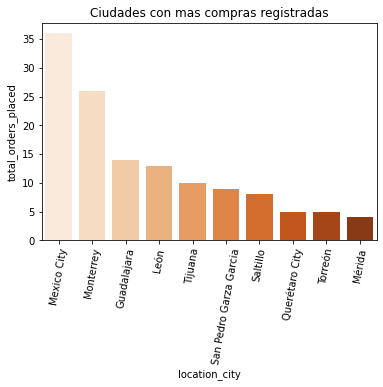

In [498]:
# Ciudades con mas compras registradas
df_orders_city = df_location[df_location.total_orders_placed > 0]
df_orders_city = df_orders_city.groupby("location_city").total_orders_placed.sum().reset_index().sort_values(by = "total_orders_placed", ascending = False)

plt.clf()
sns.barplot(data = df_orders_city[:10], x = "location_city", y = "total_orders_placed", palette= "Oranges")
plt.xticks(rotation = 80)
plt.title("Ciudades con mas compras registradas")

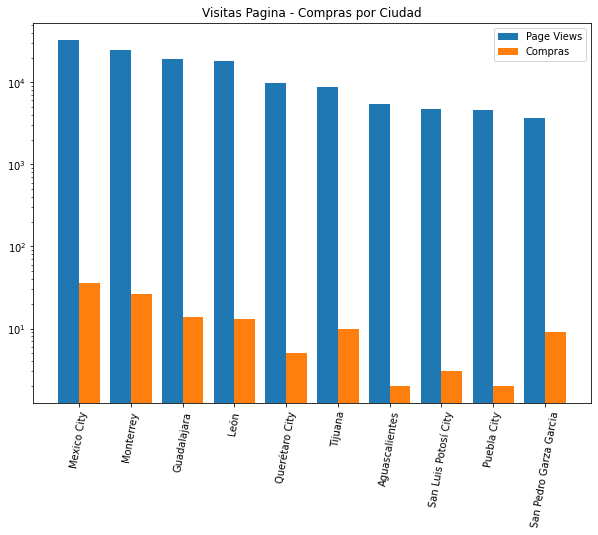

In [499]:
visitas_ciudad = df_location.groupby("location_city").total_pageviews.sum().reset_index().sort_values(by="total_pageviews", ascending = False)
compras_ciudad = df_location.groupby("location_city").total_orders_placed.sum().reset_index().sort_values(by="total_orders_placed", ascending = False)

diccionario_ciudades = {}

for ciudad, visitas in zip(visitas_ciudad.location_city, visitas_ciudad.total_pageviews):
    diccionario_ciudades[ciudad] = {"Visitas" : visitas, "Compras" : 0}

for ciudad, compras in zip(compras_ciudad.location_city, compras_ciudad.total_orders_placed):
    diccionario_ciudades[ciudad]["Compras"] = compras


x1_values = [2 * index + (0.8 * 1) for index in range(10)]
x2_values = [2 * index + (0.8 * 2) for index in range(10)]
x_values = [a + (b - a) / 2 for a, b in zip(x1_values, x2_values)]

ciudades = []
visitas = []
compras = []

cont = 0

for ciudad, dicc in diccionario_ciudades.items():
    ciudades.append(ciudad)
    visitas.append(dicc["Visitas"])
    compras.append(dicc["Compras"])
    cont += 1

    if cont == 10:
        break

plt.figure(figsize = (10, 7))
ax = plt.subplot()
plt.bar(x1_values, visitas, label = "Page Views", log = True)
plt.bar(x2_values, compras, label = "Compras", log = True)
ax.set_xticks(x_values)
ax.set_xticklabels(ciudades)
plt.xticks(rotation = 80)
plt.title("Visitas Pagina - Compras por Ciudad")
plt.legend()

In [500]:
eficiencias = []
for ciudad in ciudades:
    visitas = diccionario_ciudades[ciudad]["Visitas"]
    compras = diccionario_ciudades[ciudad]["Compras"]
    eficiencia = round(compras * 100 / visitas * 100)

    print(ciudad, "->", "visitas: ",visitas, " compras: ", compras," eficiencia: ",eficiencia)
    eficiencias.append(eficiencia)

Mexico City -> visitas:  32676  compras:  36  eficiencia:  11
Monterrey -> visitas:  24644  compras:  26  eficiencia:  11
Guadalajara -> visitas:  19363  compras:  14  eficiencia:  7
León -> visitas:  17939  compras:  13  eficiencia:  7
Querétaro City -> visitas:  9852  compras:  5  eficiencia:  5
Tijuana -> visitas:  8711  compras:  10  eficiencia:  11
Aguascalientes -> visitas:  5414  compras:  2  eficiencia:  4
San Luis Potosí City -> visitas:  4727  compras:  3  eficiencia:  6
Puebla City -> visitas:  4529  compras:  2  eficiencia:  4
San Pedro Garza Garcia -> visitas:  3702  compras:  9  eficiencia:  24


<Figure size 432x288 with 0 Axes>

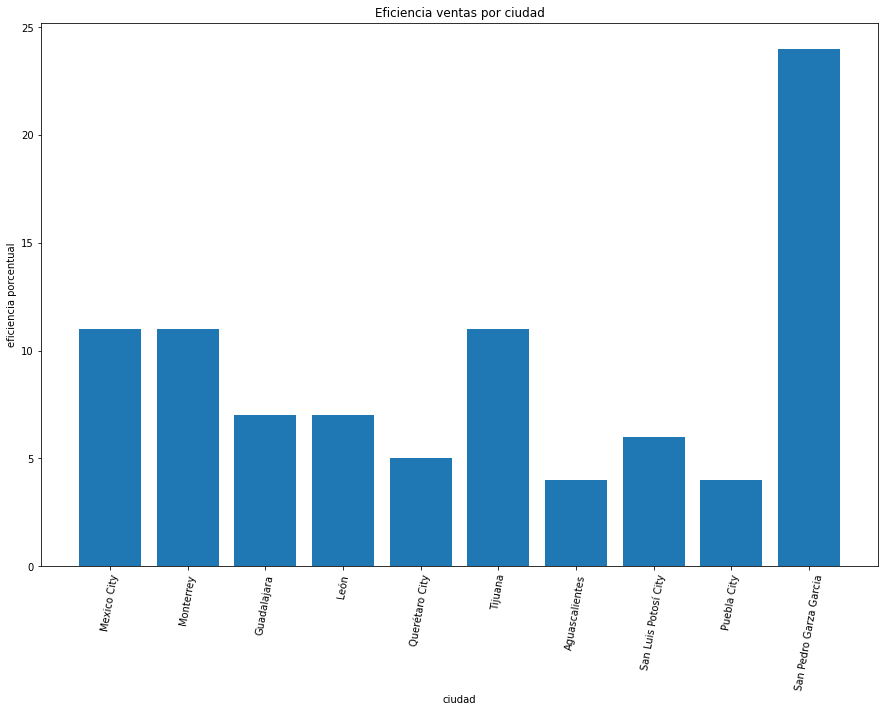

In [501]:
plt.clf()
plt.figure(figsize = (15, 10))
plt.bar(ciudades, eficiencias)
plt.title("Eficiencia ventas por ciudad")
plt.xticks(rotation = 80)
plt.xlabel("ciudad")
plt.ylabel('eficiencia porcentual')
plt.show()

In [502]:
df = pd.read_csv("customers_export_1 (7).csv")

In [503]:
df_address = df[(df.City.notna()) | (df.Province.notna())]
df_address = df_address[["First Name", "Last Name", "Address1","City", "Province", "Province Code", "Country", "Zip"]].reset_index(drop = True)

clientes_ciudad = df_address.City.value_counts().reset_index()
clientes_ciudad.columns = ["City", "Customers"]

clientes_provincia = df_address.Province.value_counts().reset_index()
clientes_provincia.columns = ["State", "Customers"] 

In [504]:
value = clientes_provincia[clientes_provincia.State == "México"]["Customers"]
index = clientes_provincia[clientes_provincia.State == "México"].index

clientes_provincia = clientes_provincia.drop(index[0])

def adding(x):
    if x.State == "Ciudad de México":
        x.Customers += int(value)
        return x
    else:
        return x


clientes_provincia = clientes_provincia.apply(adding, axis = 1)

In [505]:
value_leon = clientes_ciudad[clientes_ciudad.City == "León"]["Customers"]
index_leon = clientes_ciudad[clientes_ciudad.City == "León"].index

value_sp = clientes_ciudad[clientes_ciudad.City == "San Pedro Garza García"]["Customers"]
index_sp = clientes_ciudad[clientes_ciudad.City == "San Pedro Garza García"].index

clientes_ciudad = clientes_ciudad.drop([index_leon[0]])
clientes_ciudad = clientes_ciudad.drop([index_sp[0]])

def adding_city(x):
    if x.City == "Leon":
        x.Customers += int(value_leon)
        return x

    elif x.City == "San Pedro Garza Garcia":
        x.Customers += int(value_sp)
        return x
        
    else:
        return x

clientes_ciudad = clientes_ciudad.apply(adding_city, axis = 1)

clientes_ciudad = clientes_ciudad.sort_values(by = "Customers", ascending = False)

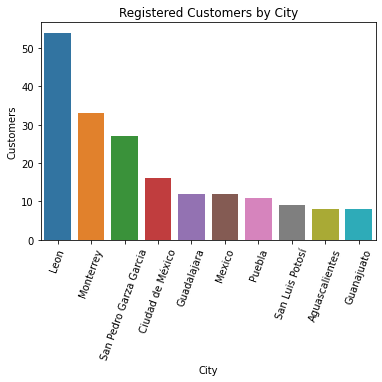

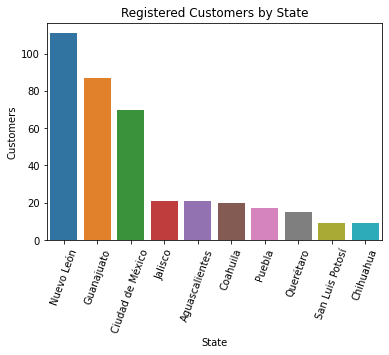

In [506]:
plt.clf()
sns.barplot(data = clientes_ciudad[:10], x = "City", y = "Customers")
plt.title("Registered Customers by City")
plt.xticks(rotation = 70)
plt.show()
# print(clientes_ciudad[:10])

plt.clf()
sns.barplot(data = clientes_provincia[:10], x = "State", y = "Customers")
plt.title("Registered Customers by State")
plt.xticks(rotation = 70)
plt.show()
# print(clientes_provincia[:10])

In [518]:
print("Clientes sin registrar ciudad:", np.sum(df.City.isna()) & np.sum(df.Province.isna()))
print("Clientes con ciuad o estado registrado:", np.sum(df.City.notna()) | np.sum(df.Province.notna()))

Clientes sin registrar ciudad: 1032
Clientes con ciuad o estado registrado: 446
